# Mussa Al Arafi Student Id: 209139176
# Required Libraries

In [1]:
import pandas as pd               #pandas for data analysis
import numpy as np                #numpy to work on arrays
import matplotlib.pyplot as plt   #for data visualisation
import seaborn as sns             #for data visualization
from sklearn.model_selection import train_test_split 
#train_test_split helps to split data into desired ratio
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
data = pd.read_csv("/home/mussa/Downloads/daily-bike-share.csv") #Reading Data Source File

# 1. Viewing Data Source File

In [2]:
dbs=pd.DataFrame(data)
dbs.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


### Descriptive Analysis of Data

In [3]:
dbs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


### Shape of DataFrame

In [4]:
dbs.shape

(731, 14)

### Checking Null Values

In [5]:
dbs.isnull().sum()   #no null value is present in the Data

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

# 2. Data Visualise

### Histogram for feature 'windspeed' and 'temp'

### Histogram for 'wnindspeed'  feature

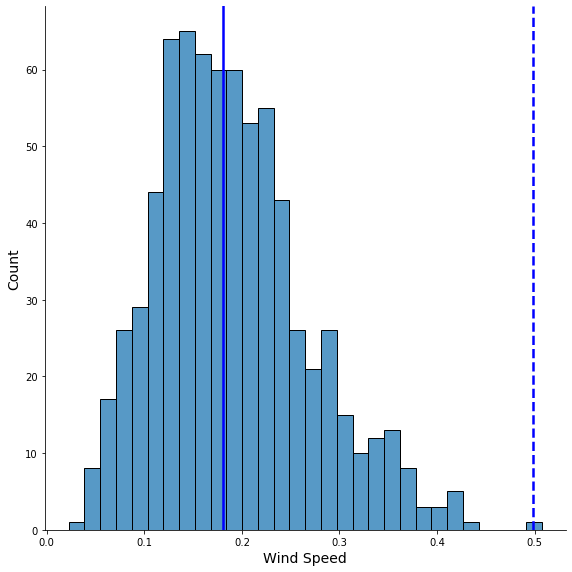

In [6]:
sns.displot(dbs, x = "windspeed",bins=30,height=8) 
plt.xlabel("Wind Speed", size=14)
plt.ylabel("Count", size=14)
plt.axvline(x=dbs.temp.median(),color='blue', ls='--', lw=2.5)   #dotted line median line
plt.axvline(x=dbs.windspeed.median(),color='blue', lw=2.5)       #solid line mean line

### Histogram for 'temp'  feature

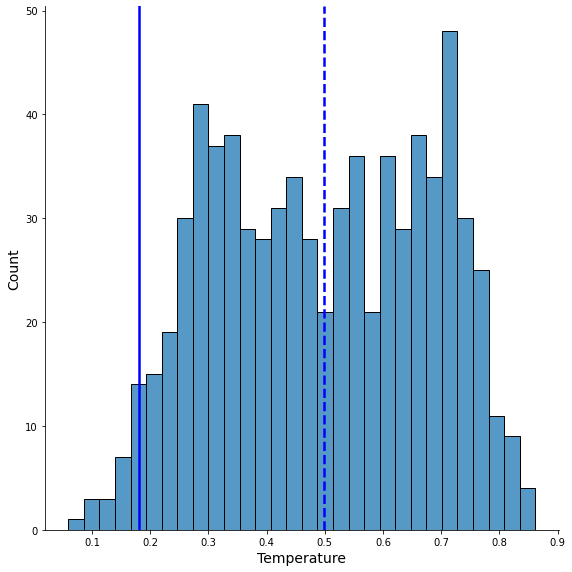

In [7]:
sns.displot(dbs, x = "temp",bins=30,height=8) 
plt.xlabel("Temperature", size=14)
plt.ylabel("Count", size=14)
plt.axvline(x=dbs.temp.median(),color='blue', ls='--', lw=2.5)   #dotted line median line
plt.axvline(x=dbs.windspeed.median(),color='blue', lw=2.5)       #solid line mean line

# 3. Data Splitting

In [8]:
X = dbs[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']]

In [9]:
y = dbs['rentals']

# 4. Splitting Data into 70% Training and 30% Testing Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_fit = StandardScaler().fit(X)
X_std = X_fit.transform(X)
sc=StandardScaler()

# 5. Model Building

In [12]:
rfc=RandomForestRegressor()
rfc.fit(X_train,y_train)

RandomForestRegressor()

# 6. Input Data for Training

In [13]:
inputData=[1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446]
arrayData=np.asarray(inputData)
reshapingData=arrayData.reshape(1,-1)
prediction=rfc.predict(reshapingData)

In [14]:
print(prediction)

[500.36]


## 7. R-Squared Value

In [15]:
rfc.score(X_test,y_test)

0.7954562860776686